In [1]:
# from https://www.youtube.com/watch?v=ZSIRNORcC4A thanks mark :) 

In [2]:
import cv2 #importing image
import numpy as np 
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting
from sklearn.manifold import TSNE #actual tsne algorithm

In [4]:
im = cv2. imread('white_background.png')
im = np.dstack([im[:,:,2], im[:,:,1], im[:,:,0]]) #reorrient from brg to rgb

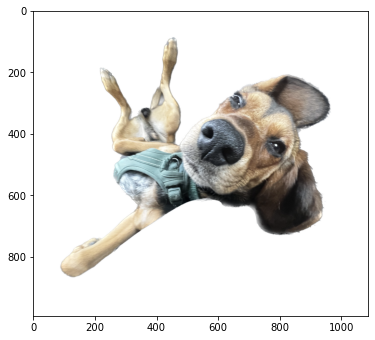

In [5]:
plt.figure(figsize=(6,6))
ax = plt.imshow(im)

# next we need to chunk our sample for tnse digestion starting at top left chunk (left to right) and then iterating down 
# each chunk will have 3 layers (RGB). We will need to seperate these layers and then flatten them. 
# the flattening will turn each layer in to lists of numbers. 
# then we'll sort each list ordering them lowest to highest as we want to compare the overall color content of each chunk, NOT their position (unbiased)

In [7]:
#loop over image in x and y direction returning and 'out' and 'avg color' list

out = []
avg_color = []

cs = 10 #chunk size = 100 total pixles (10x10)

#nested loop

for x in range(0, im.shape[1]-cs, cs): 
    for y in range (0, im.shape[0] -cs, cs): 
        #now pull out RGB layers, sort them and pull back together according to chunk size
        r = np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 0]))
        g = np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 1]))
        b = np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 2]))
        
        punch = np.concatenate((r,g,b))
        
        #we dont want any white in the tnse to filter out rgb 255 
        
        if punch.mean() < 250:
            out.append(punch)
            avg_color.append([r.mean(), g.mean(), b.mean()])
            


In [8]:
out = np.vstack((out)) # each out in an individual np array, we need to stack
avg_color = np.array(avg_color) # turn avg_color into a np array

In [9]:
out.shape 

#shows a total of 2923 chuncks and each chunk ios 10x10 for each dim (rgb)

(2923, 300)

In [43]:
#run tsne algorithm
res = TSNE(perplexity = 30, random_state = 3).fit_transform(out)

In [44]:
res.shape #same size as out

(2923, 2)

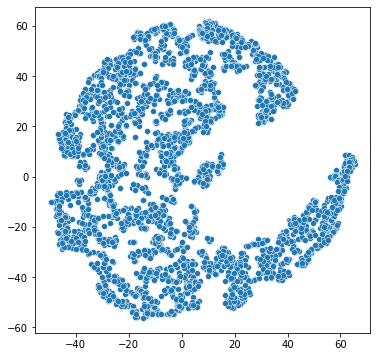

In [45]:
#plot as a scatter plot

plt.figure(figsize = (6,6))
ax = sns.scatterplot( x = res[:,0], y = res[:,1])

In [46]:
#normalize average color (divide by 255) and change to tuple instead of list
avg_color1 = avg_color/255
avg_color1 = [tuple(x) for x in avg_color1]
avg_color1

[(0.9798823529411765, 0.9785882352941176, 0.9768235294117648),
 (0.9498039215686274, 0.9346666666666666, 0.8930588235294117),
 (0.9406666666666667, 0.8832549019607843, 0.7814117647058824),
 (0.864, 0.7852549019607844, 0.6728627450980392),
 (0.8514117647058824, 0.8144705882352941, 0.7598823529411766),
 (0.9629803921568627, 0.9456078431372549, 0.8984705882352941),
 (0.9817254901960785, 0.9423921568627451, 0.8432156862745098),
 (0.9504705882352942, 0.8820392156862744, 0.7583529411764706),
 (0.884235294117647, 0.7949019607843136, 0.6534117647058824),
 (0.801921568627451, 0.7098039215686275, 0.5748627450980393),
 (0.8163921568627451, 0.7838823529411764, 0.7383529411764705),
 (0.9668627450980393, 0.9534901960784313, 0.9235686274509803),
 (0.9817647058823529, 0.9403137254901961, 0.8375686274509805),
 (0.9606666666666667, 0.9106666666666666, 0.8012156862745098),
 (0.9281568627450981, 0.8612549019607844, 0.7367843137254901),
 (0.8593725490196078, 0.7759607843137255, 0.6373725490196078),
 (0.756

In [1]:
#use patches from matplotlib to add color averages from each chunk

from matplotlib.patches import Circle 

fig, ax = plt.subplots(figsize = (6,6))

for x in range(0, len(res)):
    patch = Circle((res[x][0], res[x][1]), 1, color = avg_color1[x])
    ax.add_patch(patch)
    
plt.xlim(res[:,0].min() - 7, res[:,0].max() + 7)
plt.ylim(res[:,1].min() - 7, res[:,1].max() + 7)

NameError: name 'plt' is not defined

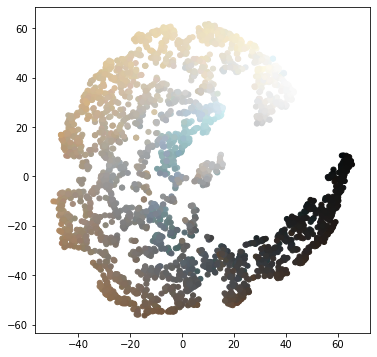

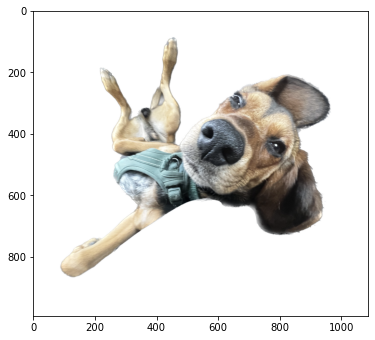

In [52]:
plt.figure(figsize=(6,6))
ax = plt.imshow(im)
fig 